
Perform analysis on the transferability score 


In [1]:
import matplotlib.pyplot as plt
from math import log, sqrt
import os
import pandas as pd
from statistics import median

In [2]:
"""
Color map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score

Wasserstein distance is calculated as the final step error from Sinkhorn OT
"""


'\nColor map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score\n\nWasserstein distance is calculated as the final step error from Sinkhorn OT\n'

In [3]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/mimic")
print(f"Will save outputs to {output_dir}")
summary_path = os.path.join(output_dir, "selected_summary_mimic.csv")
summary_df = pd.read_csv(summary_path, header=0, index_col=0)
label_codes = list(summary_df.index)


Will save outputs to /home/wanxinli/deep_patient/outputs/mimic


In [12]:
""" 
Read each label score file
"""

stat_df = pd.DataFrame(columns=['label_code','trans_target_f1', 'target_f1', 'delta_f1', 'div_score', 'w_dist', 'log_w_dist'])
stat_df = stat_df.set_index('label_code')

for code in label_codes:
    code_path = os.path.join(output_dir, "exp3_"+code+"_score.csv")
    code_df = pd.read_csv(code_path, header=0, index_col=0)
    stat_df.at[code, 'div_score'] = median(list(code_df['transfer_score']))
    stat_df.at[code, 'inverse_div_score'] = 1/stat_df.at[code, 'div_score']
    stat_df.at[code, 'w_dist'] = median(list(code_df['w_dist']))
    stat_df.at[code, 'sqrt_w_dist'] = sqrt(stat_df.at[code, 'w_dist'])
    stat_df.at[code, 'log_w_dist'] = log(stat_df.at[code, 'w_dist'])
    stat_df.at[code, 'inverse_log_w_dist'] = 1/stat_df.at[code, 'log_w_dist']
    stat_df.at[code, 'trans_target_f1'] = median(list(code_df['trans_source_f1']))
    stat_df.at[code, 'delta_f1'] = stat_df.at[code, 'trans_target_f1'] - median(list(code_df['source_f1']))


In [5]:
stat_df.shape

(276, 7)

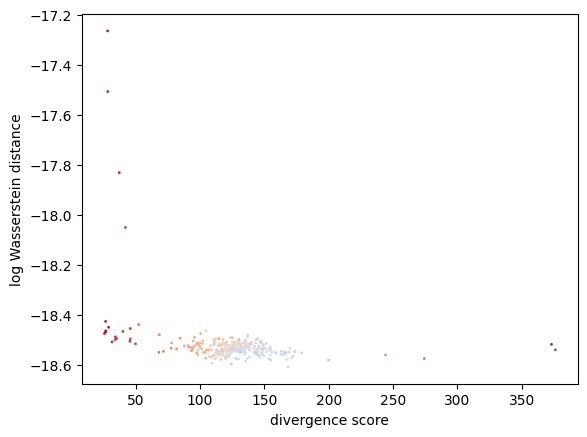

In [22]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['trans_target_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance')
# plt.ylim(-18.7, -18.4)
plt.show()

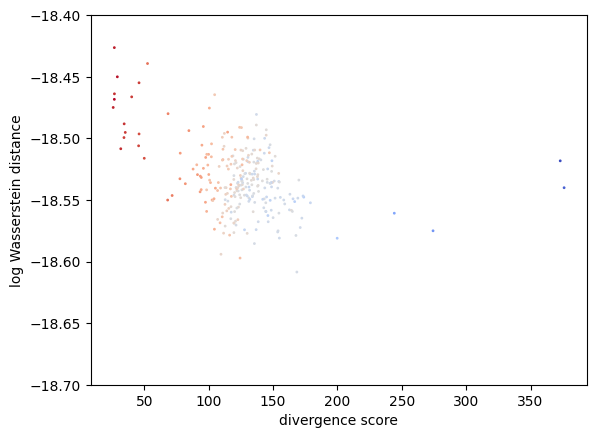

In [23]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['trans_target_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance')
plt.ylim(-18.7, -18.4)
plt.show()

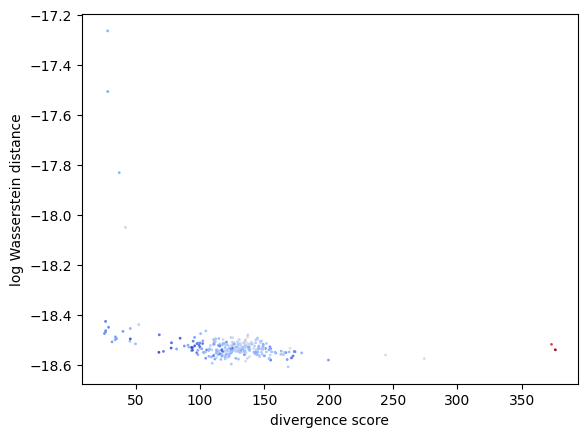

In [24]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance')
# plt.ylim(-18.7, -18.4)
plt.show()

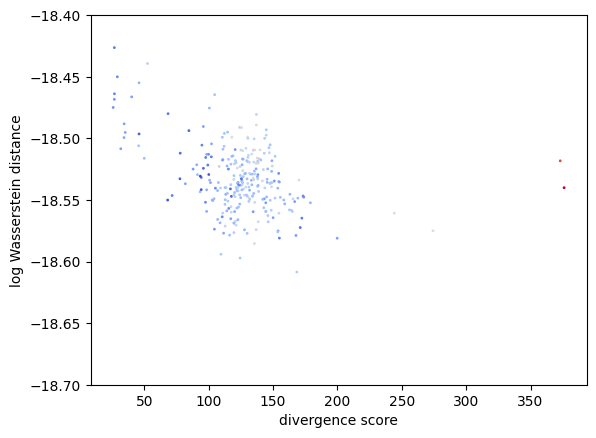

In [25]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance')
plt.ylim(-18.7, -18.4)
plt.show()

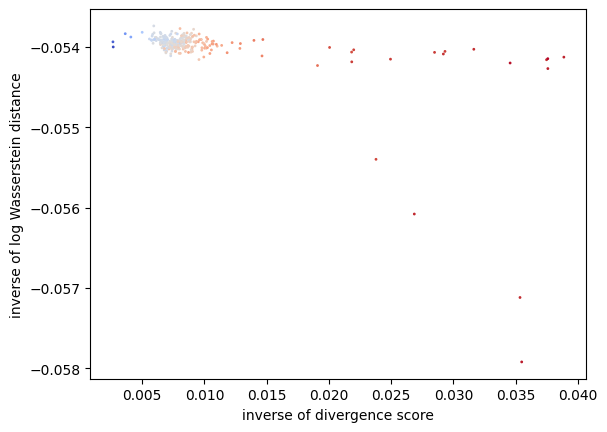

In [19]:
plt.figure()
plt.scatter(list(stat_df['inverse_div_score']), list(stat_df['inverse_log_w_dist']), s=1, c=list(stat_df['trans_target_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('inverse of divergence score')
plt.ylabel('inverse of log Wasserstein distance')
# plt.ylim(-18.7, -18.4)
plt.show()


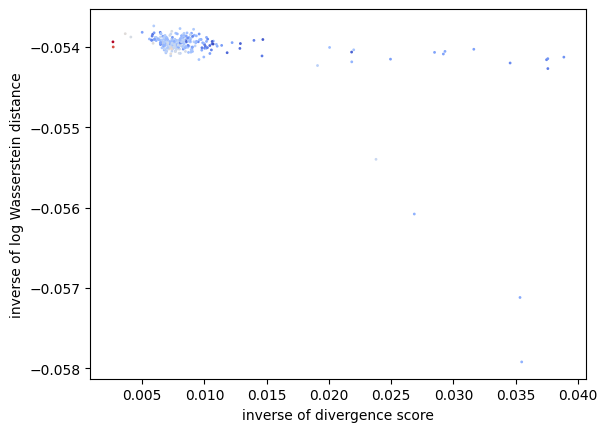

In [26]:
plt.figure()
plt.scatter(list(stat_df['inverse_div_score']), list(stat_df['inverse_log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('inverse of divergence score')
plt.ylabel('inverse of log Wasserstein distance')
# plt.ylim(-18.7, -18.4)
plt.show()


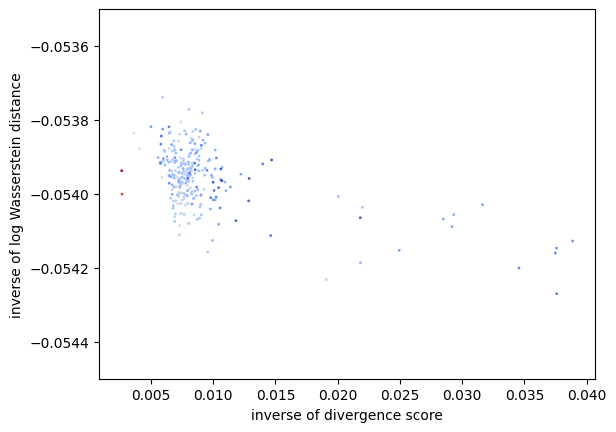

In [27]:
plt.figure()
plt.scatter(list(stat_df['inverse_div_score']), list(stat_df['inverse_log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('inverse of divergence score')
plt.ylabel('inverse of log Wasserstein distance')
plt.ylim(-0.0545, -0.0535)
plt.show()
